In [1]:
# Importation des bibliothèques python
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pour machine learning
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Pour le NLP
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
import nltk
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
# Chargement des datasets
df1 = pd.read_csv("./Data/Youtube01-Psy.csv")
df2 = pd.read_csv("./Data/Youtube02-KatyPerry.csv")
df3 = pd.read_csv("./Data/Youtube03-LMFAO.csv")
df4 = pd.read_csv("./Data/Youtube04-Eminem.csv")
df5 = pd.read_csv("./Data/Youtube05-Shakira.csv")

df = pd.concat([df1, df2, df3, df4, df5])
df = df[['CONTENT', 'CLASS']].copy()
df.CLASS.value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

In [4]:
df.sample(5)

,CONTENT,CLASS
294,follower please https://www.facebook.com/lists...,1
37,http://9gag.com/gag/aAVpwj9/ =)﻿,1
207,fav.﻿,0
377,Hi everyone! Do you like music? Then why not c...,1
147,everyday I&#39;m shufflin﻿,0


In [5]:
stopW = stopwords.words('english')
print('Il y a {} stopwords'.format(len(stopW)))
print('Les 10 premiers sont {}'.format(stopW[:10]))

Il y a 179 stopwords
Les 10 premiers sont ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [6]:
exclude = set(string.punctuation)
tokens = word_tokenize('I would like an orange juice, and a sandwich!')
print('input tokens : {}'.format(tokens))
stopW.extend(exclude)
tokens_without_stopW = [word for word in tokens if word not in stopW]
print('input tokens : {}'.format(tokens_without_stopW))

input tokens : ['I', 'would', 'like', 'an', 'orange', 'juice', ',', 'and', 'a', 'sandwich', '!']
input tokens : ['I', 'would', 'like', 'orange', 'juice', 'sandwich']


In [7]:
lemma = WordNetLemmatizer()
text = word_tokenize('The girls wanterd to play with their parents')
[lemma.lemmatize(word) for word in text]

['The', 'girl', 'wanterd', 'to', 'play', 'with', 'their', 'parent']

In [8]:
def lemmatize(sent):
    tokens = word_tokenize(sent.lower())
    tokens = [lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(w, 'v'), 'n'), 'a') for w in tokens]
    return ' '.join(tokens)

df['CONTENT'] = df.CONTENT.apply(lambda sent: lemmatize(sent))

In [9]:
from nltk import ngrams
tokens = word_tokenize('The girls wanted to play with their parents')
bigrams = ngrams(tokens, 2)
for words in bigrams:
    print(words)

('The', 'girls')
('girls', 'wanted')
('wanted', 'to')
('to', 'play')
('play', 'with')
('with', 'their')
('their', 'parents')


In [10]:
vect = TfidfVectorizer(stop_words='english', analyzer='word', ngram_range=(1,2))
tfidf_mat = vect.fit_transform(df.CONTENT)
feature_names = vect.get_feature_names_out() # to get the names of the tokens
dense = tfidf_mat.todense() # convert sparse matrix to numpy array
denselist = dense.tolist() # convert array to list
df2 = pd.DataFrame(denselist, columns=feature_names) # convert to dataframe
df2.head()

c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,00 39,00 43,00 58,00 710000,00 morning,00 pas,00 sub,000,000 000,...,ｈｔｔｐ ｗｗｗ,ｉｓ,ｉｓ ｆａｎｃy,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｔｈｉｓ,ｔｈｉｓ ｃｏｍｍｅｎｔ,ｕｓｒ,ｕｓｒ ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｗｗｗ,ｗｗｗ ｅｂａｙ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df2, df.CLASS, test_size = 0.3)

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('F1 Score :', f1_score(y_test, y_pred))

F1 Score : 0.9262435677530018


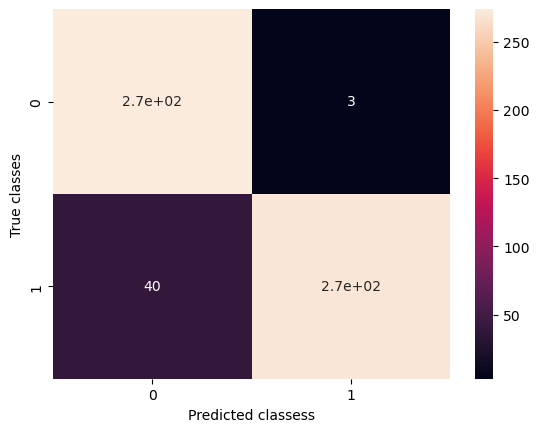

In [12]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classess')
plt.show()